<a href="https://colab.research.google.com/github/Hildafibrianti/Classification-Data-Bank/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION**
Klasifikasi merupakan fungsi pembelajaran yang memetakan (mengklasifikasi)
sebuah unsur (item) data ke dalam salah satu kelas, dimana kelas yang ada sudah didefinisikan sebelumnya. Beberapa algoritma klasifikasi yaitu Decision Tree, Random Forest, Naive Bayes dan K-Nearest Neighbor. Berikut merupakan perbandingan performance antara empat algoritma tersebut dalam membangun model klasifikasi data bank marketing (https://www.kaggle.com/janiobachmann/bank-marketing-dataset).

Pada dataset bank marketing terdapat beberapa atribut yaitu sebagai berikut:
1.   Age : usia client
2.   Job : pekerjaan calon nasabah ( admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown )
3.   Marital : status marital ( married, single, divorce )
4.   Education : tingkat pendidikan ( primary, secondary, tertiary,unknown )
5.   Balance : jumlah saldo
6.   Default : memiliki kredit default ( yes, no )
7.   Housing : memiliki cicilan rumah ( yes, no )
8.   Loan : memiliki pinjaman pribadi ( yes, no )
9.   Contact : tipe kontak komunikasi ( telephone, cellular, unknown )
10.  Day : terakhir kontak hari ke berapa 
11.  Month : terakhir kontak pada bulan apa ( januari, februari,.....,desember )
12.  Duration : durasi terakhir kali dihubungi
13.  Campaign : berapa kali mengontak client selama masa campaign ini
14.  Pdays : jumlah hari yang berlalu setelah client terakhir kali dihubungi
15.  Previous : berpa kali mengontak client sebelum masa campaign ini 
16.  Poutcome : hasil dari marketing campaign sebelumnya ( failure, success, unknown, other )
17.  Deposit : apakah client melakukan deposit ( yes, no )






**Import Libraries and Raw Dataset**

In [92]:
# Import Library
import pandas as pd

# Import Data to Google Colab
df_bank = pd.read_csv('https://raw.githubusercontent.com/Hildafibrianti/Classification-Data-Bank/master/bank.csv', sep = ',')
df_bank

# Show 10 first Row
print (df_bank.shape)
df_bank.head()

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Setiap atribut memiliki tipe data baik berupa numeric ataupun object

In [61]:
# Prints the Dataset Information
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [62]:
# Prints Descriptive Statistics
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Data Preprocessing**

**Handling Missing Values**

Sebelum mengolah data perlu dipastikan bahwa data pada dataset tidak ada yang miss . Pada dataset ini tidak terdapat data yang kosong/ hilang. Apabila terjadi missing values cara yang dapat dilakukan yaitu membuang missing data, estimasi parameter (EM Algorithm) dan imputasi (penggantian nilai yang hilang).

In [63]:
# Check for Missing Values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Encode Categorical Data**

Data kategorikal diubah menjadi nilai biner ( 0 dan 1 ), dimana 0= No dan 1= yes. Atribut yang akan diubah yaitu job, marital, education, contact, month, poutcome, default, housing, loan dan deposit. 

In [64]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank[['job','marital','education','contact','month','poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job','marital','education','contact','month','poutcome'])

# Replace Categotical Data with Encoded Data
df_bank.drop(['job','marital','education','contact','month','poutcome'] ,axis=1, inplace=True)
df_bank['default'].replace('yes',1, inplace=True)
df_bank['default'].replace('no',0, inplace=True)
df_bank['housing'].replace('yes',1, inplace=True)
df_bank['housing'].replace('no',0, inplace=True)
df_bank['loan'].replace('yes',1, inplace=True)
df_bank['loan'].replace('no',0, inplace=True)
df_bank['deposit'].replace('yes',1, inplace=True)
df_bank['deposit'].replace('no',0, inplace=True)
df_encoded= pd.concat([df_bank, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,1467,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,1389,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,579,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,673,2,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,0,733,0,0,16,83,4,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,0,29,0,0,19,156,2,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,0,0,1,8,9,2,172,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
# Show 10 first Row
print (df_encoded.shape)
df_encoded.head(6)

(11162, 49)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,1467,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,1389,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,579,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,673,2,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,42,0,0,1,1,5,562,2,-1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Set Feature and Target**
*   Fitur yang digunakan yaitu age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, prevous, dan poutcome.
*   Target nya yaitu deposit.


In [66]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,1467,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,1389,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,579,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,673,2,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,0,733,0,0,16,83,4,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,0,29,0,0,19,156,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,0,0,1,8,9,2,172,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
# Select Target
target = df_encoded['deposit']
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

 **Set Training and Testing Data**

 Data akan dibagi menjadi data training dan testing dengan perbandingan 70:30

In [68]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 48)
(3349, 48)
(7813,)
(3349,)


In [69]:
x_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8422,31,0,554,1,0,5,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9226,43,0,514,1,1,20,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8162,26,0,277,0,0,14,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4337,39,0,91,0,0,3,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2438,40,0,0,0,0,6,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,36,0,561,1,0,9,198,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2698,50,0,810,0,0,15,91,1,103,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9515,35,0,451,1,0,17,220,6,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2651,47,0,3033,0,0,8,293,1,-1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
y_test

8422    0
9226    0
8162    0
4337    1
2438    1
       ..
5642    0
2698    1
9515    0
2651    1
6891    0
Name: deposit, Length: 3349, dtype: int64

**Decision Tree**

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

In [71]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(x_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(x_test)

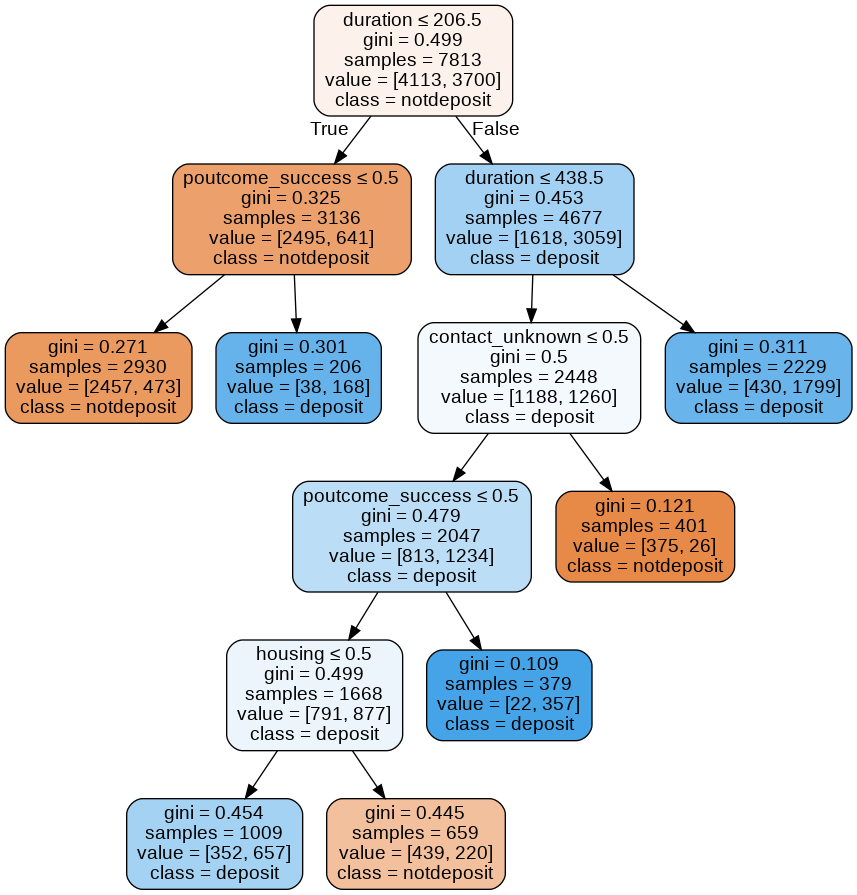

In [72]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notdeposit', 'deposit'],
                feature_names=['age', 'default', 'balance',	'housing', 'loan', 'day', 'duration',	'campaign',	'pdays',	'previous', 'job_admin.',	'job_blue-collar',	'job_entrepreneur',	'job_housemaid',	'job_management',	'job_retired',	'job_self-employed',	'job_services', 'job_student',	'job_technician',	'job_unemployed',	'job_unknown',	'marital_divorced',	'marital_married',	'marital_single',	'education_primary',	'education_secondary',	'education_tertiary',	'education_unknown',	'contact_cellular', 'contact_telephone', 'contact_unknown',	'month_apr',	'month_aug',	'month_dec',	'month_feb',	'month_jan',	'month_jul',	'month_jun',	'month_mar',	'month_may',	'month_nov',	'month_oct', 'month_sep',	'poutcome_failure',	'poutcome_other',	'poutcome_success',	'poutcome_unknown'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [73]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1360,  400],
       [ 316, 1273]])

In [74]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7862048372648551
Precision: 0.7609085475194262
Recall: 0.8011327879169289
F1 Score: 0.7805027590435316
Cohens Kappa Score: 0.5723901160630026


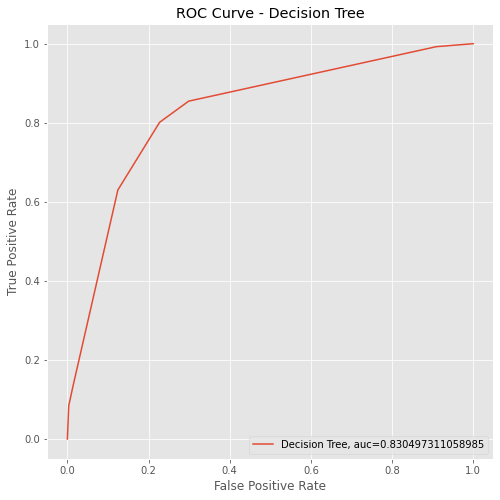

In [75]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(x_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**Naive Bayes**

Modeling Naive Bayes

In [76]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(x_test)

In [77]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[1503,  257],
       [ 624,  965]])

In [78]:
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7369363989250522
Precision: 0.7896890343698855
Recall: 0.6073001887979862
F1 Score: 0.6865884027036642
Cohens Kappa Score: 0.46651175666388145


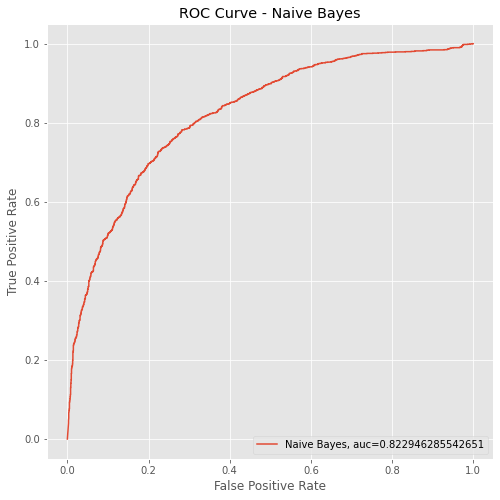

In [79]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(x_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**Random Forest**

Modeling Random Forest

In [80]:
# Import Module
from sklearn.ensemble import RandomForestClassifier

# Modeling Naive Bayes Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Predict to Test Data
y_pred_rfc= rfc.predict(x_test)

In [81]:
# Show the Confussion Matrix
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[1450,  310],
       [ 192, 1397]])

In [82]:
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
prec_rfc = metrics.precision_score(y_test, y_pred_rfc)
rec_rfc = metrics.recall_score(y_test, y_pred_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc)
kappa_rfc = metrics.cohen_kappa_score(y_test, y_pred_rfc)

print("Accuracy:", acc_rfc)
print("Precision:", prec_rfc)
print("Recall:", rec_rfc)
print("F1 Score:", f1_rfc)
print("Cohens Kappa Score:", kappa_rfc)

Accuracy: 0.8501045088085996
Precision: 0.8183948447568834
Recall: 0.8791692888609188
F1 Score: 0.8476941747572816
Cohens Kappa Score: 0.7005058201201471


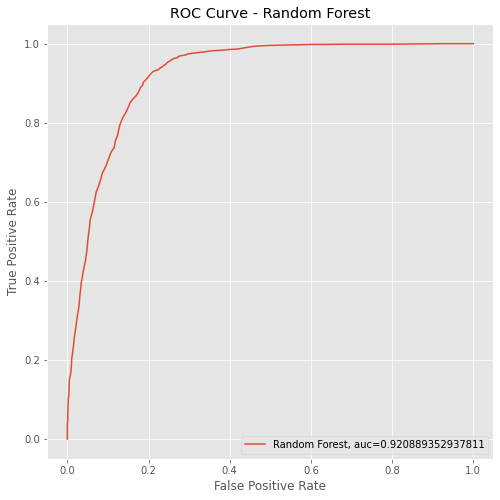

In [83]:
# ROC Curve
y_pred_rfc_proba = rfc.predict_proba(x_test)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**K-Nearest Neighbor**

Modeling K-Nearest Neighbor

In [84]:
# Import Module
from sklearn.neighbors import KNeighborsClassifier

# Modeling K-Nearest Neighbor Classifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

# Predict to Test Data
y_pred_knc= knc.predict(x_test)

In [85]:
# Show the Confussion Matrix
cm_knc = metrics.confusion_matrix(y_test, y_pred_knc)
cm_knc

array([[1382,  378],
       [ 436, 1153]])

In [86]:
acc_knc = metrics.accuracy_score(y_test, y_pred_knc)
prec_knc = metrics.precision_score(y_test, y_pred_knc)
rec_knc = metrics.recall_score(y_test, y_pred_knc)
f1_knc = metrics.f1_score(y_test, y_pred_knc)
kappa_knc = metrics.cohen_kappa_score(y_test, y_pred_knc)

print("Accuracy:", acc_knc)
print("Precision:", prec_knc)
print("Recall:", rec_knc)
print("F1 Score:", f1_knc)
print("Cohens Kappa Score:", kappa_knc)

Accuracy: 0.7569423708569722
Precision: 0.7531025473546702
Recall: 0.7256135934550031
F1 Score: 0.7391025641025641
Cohens Kappa Score: 0.5117482978893362


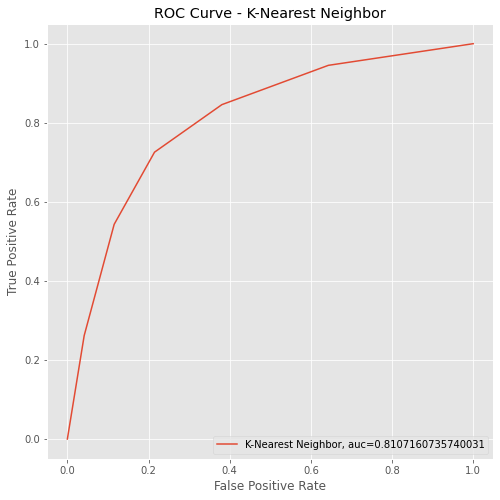

In [87]:
# ROC Curve
y_pred_knc_proba = knc.predict_proba(x_test)[::,1]
fprknc, tprknc, _ = metrics.roc_curve(y_test,  y_pred_knc_proba)
aucknc = metrics.roc_auc_score(y_test, y_pred_knc_proba)
plt.plot(fprknc,tprknc,label="K-Nearest Neighbor, auc="+str(aucknc))
plt.title('ROC Curve - K-Nearest Neighbor')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [88]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)
print("_______________________")
print("Random Forest Accuracy:", acc_rfc)
print("Random Forest Precision:", prec_rfc)
print("Random Forest Recall:", rec_rfc)
print("Random Forest F1 Score:", f1_rfc)
print("_______________________")
print("K-Nearest Neighbor Accuracy:", acc_knc)
print("K-Nearest Neighbor Precision:", prec_knc)
print("K-Nearest Neighbor Recall:", rec_knc)
print("K-Nearest Neighbor F1 Score:", f1_knc)

Decision Tree Accuracy = 0.7862048372648551
Decision Tree Precision = 0.7609085475194262
Decision Tree Recall = 0.8011327879169289
Decision Tree F1-Score = 0.7805027590435316
_______________________
Naive Bayes Accuracy = 0.7369363989250522
Naive Bayes Precision = 0.7896890343698855
Naive Bayes Recall = 0.6073001887979862
Naive Bayes F1-Score = 0.6865884027036642
_______________________
Random Forest Accuracy: 0.8501045088085996
Random Forest Precision: 0.8183948447568834
Random Forest Recall: 0.8791692888609188
Random Forest F1 Score: 0.8476941747572816
_______________________
K-Nearest Neighbor Accuracy: 0.7569423708569722
K-Nearest Neighbor Precision: 0.7531025473546702
K-Nearest Neighbor Recall: 0.7256135934550031
K-Nearest Neighbor F1 Score: 0.7391025641025641


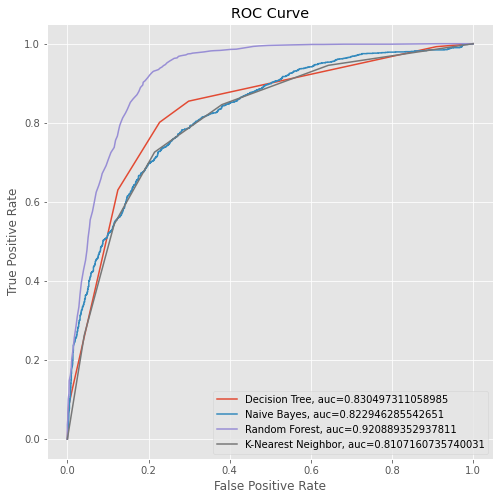

In [89]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.plot(fprknc,tprknc,label="K-Nearest Neighbor, auc="+str(aucknc))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [90]:
# Create Datafame Contains Fature and Result of prediction
df_compare = x_test.copy()
df_compare['ActualClass'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb
df_compare['Random Forest'] = y_pred_rfc
df_compare['K-Nearest Neighbor'] = y_pred_knc

In [91]:
df_compare.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,DecisonTree,NaiveBayes,Random Forest,K-Nearest Neighbor
8422,31,0,554,1,0,5,94,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
9226,43,0,514,1,1,20,34,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
8162,26,0,277,0,0,14,514,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1
4337,39,0,91,0,0,3,213,1,185,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,1,1
2438,40,0,0,0,0,6,131,2,98,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1,0


**ROC Curve**

Receiver Operating Characteristic Curve (ROC) merupakan sebuah penghitungan statistika untuk menilai akurasi dari sebuah prediksi. ROC juga menghasilkan
nilai Area Under The Curve (AUC). Nilai AUC memiliki rentang antara 50% (0.5)
sampai dengan 100% (1). Menurut Metz (1978) interpretasi nilai AUC diklasifikasikan menjadi lima bagian yang berbeda yaitu sebagai berikut: 
*   0.5 – 0.6 (tingkat akurasi sangat lemah)
*   0.6 – 0.7 (tingkat akurasi lemah)
*   0.7 – 0.8 (tingkat akurasi sedang)
*   0.8 – 0.9 (tingkat akurasi tinggi)
*   0.9 – 1 (tingkat akurasi sangat tinggi)

Berdasarkan hasil perbandingan keempat algoritma yang telah dilakukan, dapat diketahui bahwa dengan menggunakan algoritma random forest memiliki performance yang lebih baik dibandingkan dengan tiga algoritma lainnya karena memperoleh nilai AUC tertinggi (AUC= 0.9188) yang tergolong kedalam klasifikasi tingkat akurasi sangat tinggi.

